In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import load

%matplotlib inline

In [8]:
def GetMonday(firstDay, way='forward'):
    firstEntry = firstDay.astype('M8[D]')
    beforeMonday = np.busday_offset(firstEntry, 0, way, [1,0,0,0,0,0,0])
    if abs(firstEntry-beforeMonday) == np.timedelta64(7, 'D'):
        return firstEntry.astype('M8[s]')
    else:
        return beforeMonday.astype('M8[s]')

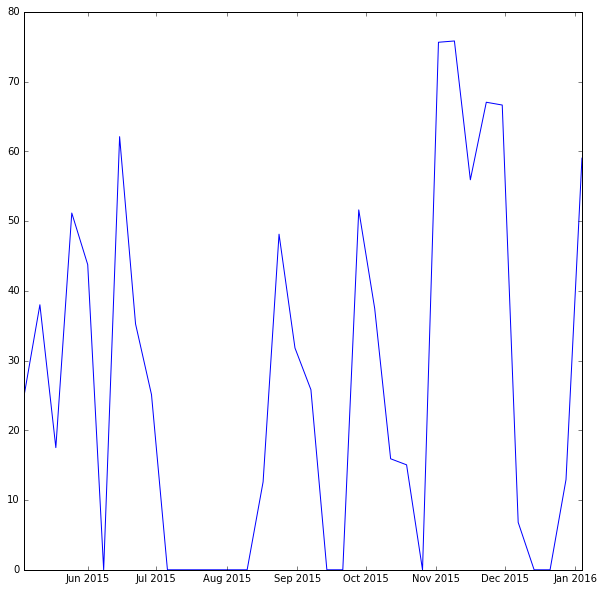

In [10]:
fig = plt.figure(figsize=(10, 10))

# Process Data

log = np.array(load.sessions, dtype='datetime64') # load data

# init some const

begin = GetMonday(np.min(log.flatten()), way='backward')
end = GetMonday(np.max(log.flatten()))

n_logs = log.shape[0]*1.0
week_td64 = np.timedelta64(1, 'W')

weeks_entry = np.floor((log[:,0]-begin)/week_td64)
hours_spent = (log[:,1]-log[:,0]).astype('timedelta64[m]')

week_hours = np.bincount(weeks_entry.astype('int64'), hours_spent.astype('float64') / 60)

plt.plot(np.arange(begin, end, week_td64), week_hours, 'b')

In [4]:
day = np.array(a.dataDay, dtype='timedelta64') / float(3.6e9)
week = np.array(a.dataWeek, dtype='timedelta64') / float(3.6e9)
week = ((week * np.ones((7, 1))).T.reshape(1, 7 * len(week)) / 7)[0]
day_scale = np.datetime64(a.begin) + np.arange(len(day)) * np.timedelta64(1, 'D')
scale = np.arange(len(day))

In [5]:
#print len(week)
#print len(week[(7 - a.firstWeekLen):-(1 + (7 - a.lastWeekLen))])
#print len(week[(7 - a.firstWeekLen):-1])
#print len(day_scale)
#print a.begin
#print len(day_scale)
#print a.firstWeekLen
#print a.lastWeekLen

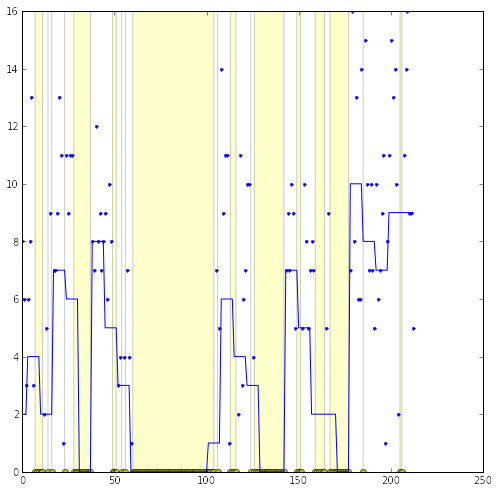

In [13]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

mask_dayof = (day == np.timedelta64(0))
mask_dayon = np.logical_not(mask_dayof)

ax.plot(scale[mask_dayof], day[mask_dayof], 'yo')
ax.plot(scale[mask_dayon], day[mask_dayon], 'b.')
ax.fill_between(np.arange(len(day_scale)), 0, 16, where=mask_dayof, facecolor='yellow', alpha=0.2)
w = np.append(week, week[-1])[7-a.firstWeekLen:- (1 + (7-a.lastWeekLen))]
ax.plot(scale, w, 'b')

In [8]:
dayOf = np.array(a.dayOf[1])
print dayOf
y = sorted(list(set(a.dayOf[1])))
x = [a.dayOf[1].count(d) for d in y]
print x
print y
X = np.array(x)
Y = np.array(y)

print list(X*Y)
s2 = np.array([sum(list(X*Y)[:1+i]) for i in range(len(x))])
#print [reduce(lambda a,b: a+b, list(X*Y)[:1+i] for i in (range(len(x))))]

[ 5  1  1  1 10  3  1  1 45  1  4  1 17  2  6 11  2]
[7, 2, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 2, 3, 4, 5, 6, 10, 11, 17, 45]
[7, 4, 3, 4, 5, 6, 10, 11, 17, 45]


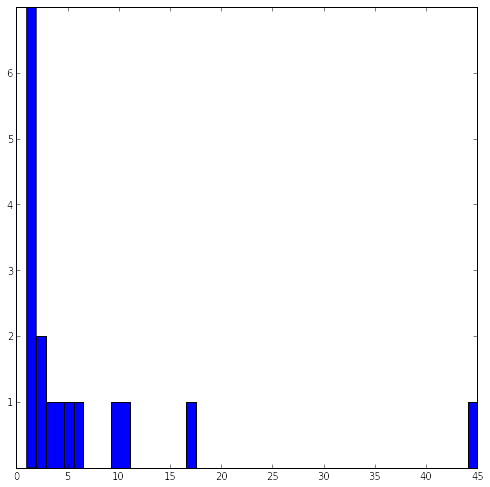

In [19]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax.hist(dayOf, max(dayOf + 3))
ax.yaxis.set_major_locator(plt.FixedLocator(y))
#newax = ax[0][1].twinx()
#s = np.arange(8)
#newax.plot(s,s2)

